In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

/Users/xuerongrong/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
boros = gpd.read_file('data/boundary.gpkg')

<AxesSubplot:>

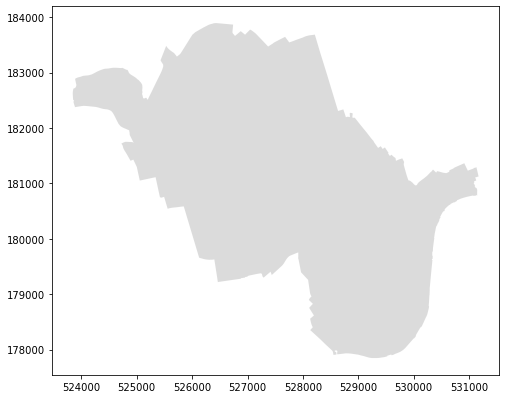

In [3]:
boros.plot(figsize=(8,8), color='lightgrey', alpha=0.8)

In [4]:
nonepc = pd.read_csv('data/certificates_nondom.csv', low_memory=False)

In [5]:
nonepc.shape

(20897, 40)

In [6]:
nonepc.columns

Index(['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE',
       'BUILDING_REFERENCE_NUMBER', 'ASSET_RATING', 'ASSET_RATING_BAND',
       'PROPERTY_TYPE', 'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY',
       'COUNTY', 'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'NEW_BUILD_BENCHMARK',
       'EXISTING_STOCK_BENCHMARK', 'BUILDING_LEVEL', 'MAIN_HEATING_FUEL',
       'OTHER_FUEL_DESC', 'SPECIAL_ENERGY_USES', 'RENEWABLE_SOURCES',
       'FLOOR_AREA', 'STANDARD_EMISSIONS', 'TARGET_EMISSIONS',
       'TYPICAL_EMISSIONS', 'BUILDING_EMISSIONS', 'AIRCON_PRESENT',
       'AIRCON_KW_RATING', 'ESTIMATED_AIRCON_KW_RATING',
       'AC_INSPECTION_COMMISSIONED', 'BUILDING_ENVIRONMENT', 'ADDRESS',
       'LOCAL_AUTHORITY_LABEL', 'CONSTITUENCY_LABEL', 'POSTTOWN',
       'LODGEMENT_DATETIME', 'PRIMARY_ENERGY_VALUE', 'UPRN', 'UPRN_SOURCE'],
      dtype='object')

In [7]:
coo=['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 
       'PROPERTY_TYPE', 'INSPECTION_DATE', 'LOCAL_AUTHORITY', 'CONSTITUENCY',
       'COUNTY', 'LODGEMENT_DATE', 'TRANSACTION_TYPE', 'NEW_BUILD_BENCHMARK',
       'EXISTING_STOCK_BENCHMARK', 'BUILDING_LEVEL', 
       'OTHER_FUEL_DESC', 'SPECIAL_ENERGY_USES', 'RENEWABLE_SOURCES',
       'FLOOR_AREA', 'STANDARD_EMISSIONS', 'TARGET_EMISSIONS',
       'TYPICAL_EMISSIONS', 'BUILDING_EMISSIONS', 'AIRCON_PRESENT',
       'AIRCON_KW_RATING', 'ESTIMATED_AIRCON_KW_RATING',
       'AC_INSPECTION_COMMISSIONED', 'BUILDING_ENVIRONMENT', 'ADDRESS',
       'LOCAL_AUTHORITY_LABEL', 'CONSTITUENCY_LABEL', 'POSTTOWN',
       'LODGEMENT_DATETIME', 'PRIMARY_ENERGY_VALUE', 'UPRN_SOURCE']

In [8]:
nonepc = nonepc.drop(coo, axis=1)
nonepc.columns

Index(['POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'ASSET_RATING',
       'ASSET_RATING_BAND', 'MAIN_HEATING_FUEL', 'UPRN'],
      dtype='object')

In [9]:
nonepc.head(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,ASSET_RATING,ASSET_RATING_BAND,MAIN_HEATING_FUEL,UPRN
0,W1U 3BZ,6.803583e+11,82,D,Grid Supplied Electricity,NaN
1,W1K 5DT,4.970680e+11,146,F,Natural Gas,1.000235e+11
2,SW1P 2HY,1.303077e+11,87,D,Grid Supplied Electricity,1.003354e+10


In [10]:
dec = pd.read_csv('data/display.csv', low_memory=False)
dec.shape

(3045, 53)

In [11]:
dec.columns

Index(['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE',
       'BUILDING_REFERENCE_NUMBER', 'CURRENT_OPERATIONAL_RATING',
       'YR1_OPERATIONAL_RATING', 'YR2_OPERATIONAL_RATING',
       'OPERATIONAL_RATING_BAND', 'ELECTRIC_CO2', 'HEATING_CO2',
       'RENEWABLES_CO2', 'PROPERTY_TYPE', 'INSPECTION_DATE', 'LOCAL_AUTHORITY',
       'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE', 'MAIN_BENCHMARK',
       'MAIN_HEATING_FUEL', 'OTHER_FUEL', 'SPECIAL_ENERGY_USES',
       'RENEWABLE_SOURCES', 'TOTAL_FLOOR_AREA', 'ANNUAL_THERMAL_FUEL_USAGE',
       'TYPICAL_THERMAL_FUEL_USAGE', 'ANNUAL_ELECTRICAL_FUEL_USAGE',
       'TYPICAL_ELECTRICAL_FUEL_USAGE', 'RENEWABLES_FUEL_THERMAL',
       'RENEWABLES_ELECTRICAL', 'YR1_ELECTRICITY_CO2', 'YR2_ELECTRICITY_CO2',
       'YR1_HEATING_CO2', 'YR2_HEATING_CO2', 'YR1_RENEWABLES_CO2',
       'YR2_RENEWABLES_CO2', 'AIRCON_PRESENT', 'AIRCON_KW_RATING',
       'ESTIMATED_AIRCON_KW_RATING', 'AC_INSPECTION_COMMISSIONED',
       'BUILDING_ENVIRONMENT', 'BUILDI

In [12]:
qoo=['LMK_KEY', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 
       'YR1_OPERATIONAL_RATING', 'YR2_OPERATIONAL_RATING',
       'ELECTRIC_CO2', 'HEATING_CO2',
       'RENEWABLES_CO2', 'PROPERTY_TYPE', 'INSPECTION_DATE', 'LOCAL_AUTHORITY',
       'CONSTITUENCY', 'COUNTY', 'LODGEMENT_DATE', 'MAIN_BENCHMARK',
       'OTHER_FUEL', 'SPECIAL_ENERGY_USES',
       'RENEWABLE_SOURCES', 'TOTAL_FLOOR_AREA', 'ANNUAL_THERMAL_FUEL_USAGE',
       'TYPICAL_THERMAL_FUEL_USAGE', 'ANNUAL_ELECTRICAL_FUEL_USAGE',
       'TYPICAL_ELECTRICAL_FUEL_USAGE', 'RENEWABLES_FUEL_THERMAL',
       'RENEWABLES_ELECTRICAL', 'YR1_ELECTRICITY_CO2', 'YR2_ELECTRICITY_CO2',
       'YR1_HEATING_CO2', 'YR2_HEATING_CO2', 'YR1_RENEWABLES_CO2',
       'YR2_RENEWABLES_CO2', 'AIRCON_PRESENT', 'AIRCON_KW_RATING',
       'ESTIMATED_AIRCON_KW_RATING', 'AC_INSPECTION_COMMISSIONED',
       'BUILDING_ENVIRONMENT', 'BUILDING_CATEGORY', 'ADDRESS',
       'LOCAL_AUTHORITY_LABEL', 'CONSTITUENCY_LABEL', 'POSTTOWN',
       'NOMINATED_DATE', 'OR_ASSESSMENT_END_DATE', 'LODGEMENT_DATETIME',
       'OCCUPANCY_LEVEL', 'UPRN_SOURCE']

In [13]:
dec = dec.drop(qoo, axis=1)
dec.columns

Index(['POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'CURRENT_OPERATIONAL_RATING',
       'OPERATIONAL_RATING_BAND', 'MAIN_HEATING_FUEL', 'UPRN'],
      dtype='object')

In [14]:
dec.head(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_OPERATIONAL_RATING,OPERATIONAL_RATING_BAND,MAIN_HEATING_FUEL,UPRN
0,W1A 3AE,125916550000,74.0,C,Natural Gas,NaN
1,SW1H 0TL,194163680000,160.0,G,Natural Gas,NaN
2,SW7 2PG,193885300000,124.0,E,Natural Gas,1.000234e+11


In [15]:
print(nonepc['BUILDING_REFERENCE_NUMBER'].nunique())
print(dec['BUILDING_REFERENCE_NUMBER'].nunique())

18350
683


In [16]:
nonepc.columns = ['POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'RATING',
       'BAND', 'MAIN_HEATING_FUEL', 'UPRN']

dec.columns = ['POSTCODE', 'BUILDING_REFERENCE_NUMBER', 'RATING',
       'BAND', 'MAIN_HEATING_FUEL', 'UPRN']

In [17]:
total = nonepc.isnull().sum().sort_values(ascending=False)
percent = (nonepc.isnull().sum()/nonepc.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
UPRN,10197,0.487965
BUILDING_REFERENCE_NUMBER,431,0.020625
POSTCODE,0,0.000000
RATING,0,0.000000
BAND,0,0.000000


In [18]:
total = dec.isnull().sum().sort_values(ascending=False)
percent = (dec.isnull().sum()/dec.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
UPRN,1123,0.368801
POSTCODE,0,0.000000
BUILDING_REFERENCE_NUMBER,0,0.000000
RATING,0,0.000000
BAND,0,0.000000


In [19]:
nontotal = nonepc.append(dec, ignore_index=True)
nontotal

,POSTCODE,BUILDING_REFERENCE_NUMBER,RATING,BAND,MAIN_HEATING_FUEL,UPRN
0,W1U 3BZ,6.803583e+11,82.0,D,Grid Supplied Electricity,NaN
1,W1K 5DT,4.970680e+11,146.0,F,Natural Gas,1.000235e+11
2,SW1P 2HY,1.303077e+11,87.0,D,Grid Supplied Electricity,1.003354e+10
3,W1F 8DS,7.068336e+11,80.0,D,Grid Supplied Electricity,1.003359e+10
4,W1S 3PD,5.174468e+11,51.0,C,Natural Gas,NaN
...,...,...,...,...,...,...
23937,W1U 4DF,1.000088e+10,69.0,C,Natural Gas,1.000235e+11
23938,SW1W 9TP,1.000208e+10,172.0,G,Natural Gas,1.003353e+10
23939,WC2B 6LE,1.000087e+10,46.0,B,Natural Gas,1.000234e+11
23940,SW1W 9TP,1.000208e+10,441.0,G,Grid Supplied Electricity,1.003353e+10


In [20]:
#it removes duplicate rows based on all columns
nontotal.drop_duplicates(inplace=True)

In [21]:
nontotal.shape

(23575, 6)

In [22]:
test = nontotal.drop(columns='RATING')
test.drop_duplicates(inplace=True)
test.shape

(21550, 5)

In [23]:
print(nontotal['BUILDING_REFERENCE_NUMBER'].nunique())
print(nontotal['UPRN'].nunique())

18929
7280


In [24]:
uprncsv = pd.read_csv('data/osopenuprn_202206.csv')

In [25]:
uprncsv.sample(3)

,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
16280940,10023266895,475766.81,385803.6,53.363705,-0.862898
25800789,100023277321,537955.00,173393.0,51.442735,-0.016362
27446441,100040011646,225589.00,53195.0,50.352754,-4.453068


In [27]:
epcuprn = pd.merge(nontotal, uprncsv, how="left",on='UPRN')
print(epcuprn.shape)

(23575, 10)


In [28]:
total = epcuprn.isnull().sum().sort_values(ascending=False)
percent = (nonepc.isnull().sum()/epcuprn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
X_COORDINATE,11186,NaN
Y_COORDINATE,11186,NaN
LATITUDE,11186,NaN
LONGITUDE,11186,NaN
UPRN,11167,0.432534
BUILDING_REFERENCE_NUMBER,413,0.018282
POSTCODE,0,0.000000
RATING,0,0.000000
BAND,0,0.000000
MAIN_HEATING_FUEL,0,0.000000


In [29]:
print(nonepc['UPRN'].nunique())
print(epcuprn['UPRN'].nunique())

7095
7280


In [30]:
naepcuprn = epcuprn.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [31]:
print(naepcuprn.shape)

(12389, 10)


In [32]:
geoepcuprn = gpd.GeoDataFrame(naepcuprn, 
      geometry=gpd.points_from_xy(naepcuprn['LONGITUDE'], naepcuprn['LATITUDE'], crs='epsg:4326'))
geoepcuprn = geoepcuprn.to_crs('epsg:27700')

In [33]:
geoepcuprn.sample(3)

,POSTCODE,BUILDING_REFERENCE_NUMBER,RATING,BAND,MAIN_HEATING_FUEL,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
10807,W1F 9ZN,1.000086e+10,86.0,D,Natural Gas,1.003362e+10,529412.0,180757.0,51.510930,-0.136518,POINT (529413.750 180757.214)
12595,SW1H 0HW,8.977689e+11,71.0,C,Grid Supplied Electricity,1.000233e+11,529548.0,179254.0,51.497392,-0.135111,POINT (529549.727 179254.183)
21266,W1F 7EL,7.756208e+11,86.0,D,Natural Gas,1.003361e+10,529330.0,181066.0,51.513726,-0.137586,POINT (529331.751 181066.220)


In [34]:
geoepcuprn = geoepcuprn.drop(geoepcuprn[(geoepcuprn.LONGITUDE > -0.1)].index, axis=0)
print(f"Data frame is {geoepcuprn.shape[0]:,} x {geoepcuprn.shape[1]}")
print(f"Number of unique UPRN is {geoepcuprn['UPRN'].nunique()}")

Data frame is 12,387 x 11
Number of unique UPRN is 7266


<AxesSubplot:>

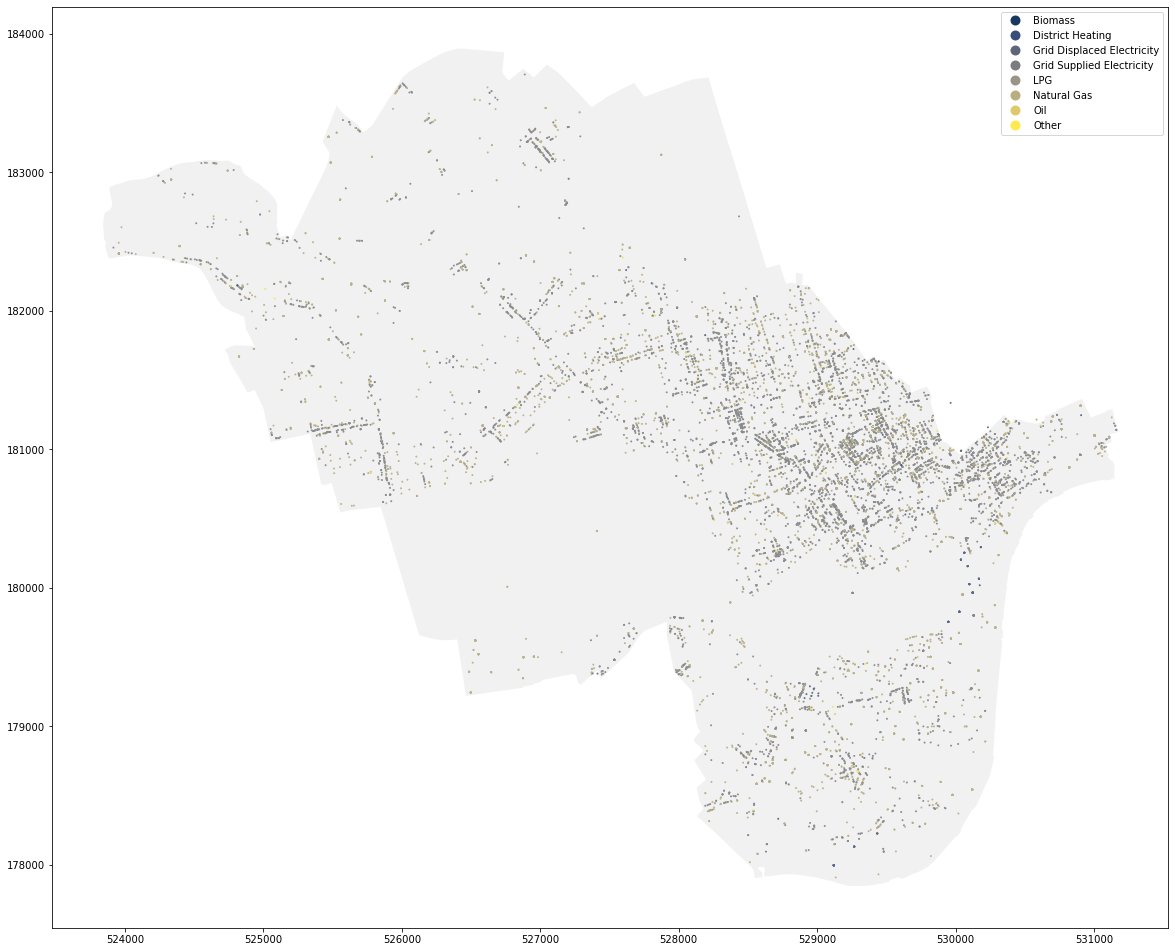

In [35]:
ax = geoepcuprn.plot(column='MAIN_HEATING_FUEL',cmap='cividis', markersize=1, legend=True, alpha=0.9, figsize=(20,20))
#green.plot(color='olive', alpha=0.6, ax=ax)
boros.plot(color='lightgrey', alpha=0.3, ax=ax)

In [36]:
count = geoepcuprn.groupby('MAIN_HEATING_FUEL')['UPRN'].count()
print("Frequency of MAIN_HEATING_FUEL:\n", count)

Frequency of MAIN_HEATING_FUEL:
 MAIN_HEATING_FUEL
Biomass                          3
District Heating               127
Grid Displaced Electricity       2
Grid Supplied Electricity     6892
LPG                              2
Natural Gas                   5181
Oil                             64
Other                          116
Name: UPRN, dtype: int64


### MAIN HEATING FUEL

In [37]:
nonheat = geoepcuprn.copy()

In [38]:
nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
    r'(^.*Biomass.*$)', 'Other (Oil, LPG, Coal, etc.)')
nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
    r'(^.*Oil.*$)', 'Other (Oil, LPG, Coal, etc.)')
nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
    r'(^.*LPG.*$)', 'Other (Oil, LPG, Coal, etc.)')
nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
    r'(^.*Other.*$)', 'Other (Oil, LPG, Coal, etc.)')
nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
    r'(^.*Grid.*$)', 'Electricity')

/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96495/363853451.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96495/363853451.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96495/363853451.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
/var/folders/2v/0j9t8l155ydg312dccl4xxwc0000gn/T/ipykernel_96495/363853451.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  nonheat['MAIN_HEATING_FUEL'] = nonheat.MAIN_HEATING_FUEL.str.replace(
/var/folders

In [39]:
count = nonheat.groupby('MAIN_HEATING_FUEL')['UPRN'].count()
print("Frequency of MAIN_HEATING_FUEL:\n", count)

Frequency of MAIN_HEATING_FUEL:
 MAIN_HEATING_FUEL
District Heating                 127
Electricity                     6894
Natural Gas                     5181
Other (Oil, LPG, Coal, etc.)     185
Name: UPRN, dtype: int64


In [40]:
#nonheat.to_file("nonheat.geojson", driver="GeoJSON")

In [41]:
nonyes = nonheat.loc[nonheat['MAIN_HEATING_FUEL'] == 'Natural Gas']
nonyes.shape

(5181, 11)

In [88]:
#nonyes.to_file("nonyes.geojson", driver="GeoJSON")